In [1]:
import pandas as pd
import seaborn as sns
from matplotlib.offsetbox import AnchoredText
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.offsetbox import AnchoredText

In [2]:
# Read in the ESI data
esi_path = 'C:/Users/Corey4005/Desktop/NOAA/SCANAnalysis/data/ESI_1wk_tif2select_pt.csv'
esi = pd.read_csv(esi_path)
esi['Date'] = pd.to_datetime(esi['Date'])
esi

,Date,ESI,station
0,2001-01-01,0.212788,2057:AL:SCAN
1,2001-01-01,0.565784,2078:AL:SCAN
2,2001-01-01,2.316189,2177:AL:SCAN
3,2001-01-01,-9999.000000,2113:AL:SCAN
4,2001-01-01,0.120552,2174:AL:SCAN
...,...,...,...
19075,2020-12-30,-1.124450,2056:AL:SCAN
19076,2020-12-30,-0.528438,2179:AL:SCAN
19077,2020-12-30,0.047133,2115:AL:SCAN
19078,2020-12-30,0.207961,2175:AL:SCAN


In [3]:
# Read in the SCAN data
scan_path = 'C:/Users/Corey4005/Desktop/NOAA/SCANAnalysis/data/SCAN_DEPTHS_ALL.csv'
scan = pd.read_csv(scan_path)

# Just get the columns we are interested in and convert dates to datetime
sms = scan[['Date', 'station','SMS-2.0in', 'SMS-4.0in', 'SMS-8.0in', 'SMS-20.0in','SMS-40.0in']].copy()
sms['Date'] = pd.to_datetime(sms['Date'])
sms

,Date,station,SMS-2.0in,SMS-4.0in,SMS-8.0in,SMS-20.0in,SMS-40.0in
0,2002-04-24,2057:AL:SCAN,14.7,12.7,16.6,33.8,35.1
1,2002-04-25,2057:AL:SCAN,14.5,11.8,16.0,NaN,34.9
2,2002-04-26,2057:AL:SCAN,13.5,11.6,15.4,34.4,34.9
3,2002-04-27,2057:AL:SCAN,13.2,11.5,15.5,33.8,34.9
4,2002-04-28,2057:AL:SCAN,13.5,11.5,15.0,32.5,34.6
...,...,...,...,...,...,...,...
79218,2019-10-12,2182:AL:SCAN,NaN,NaN,NaN,NaN,NaN
79219,2020-03-28,2182:AL:SCAN,NaN,NaN,NaN,NaN,NaN
79220,2020-05-31,2182:AL:SCAN,NaN,NaN,NaN,NaN,NaN
79221,2019-09-21,2176:AL:SCAN,NaN,NaN,NaN,NaN,NaN


In [4]:
#create the rolling averages for each level of the soil moisture column. 
#The window is set for 7 days and the minimum periods required for each week is at least 3 days of data.
sms.set_index('Date', inplace=True)
sms_station_2053 = sms[sms['station'] == '2053:AL:SCAN']
sms_station_2053

,station,SMS-2.0in,SMS-4.0in,SMS-8.0in,SMS-20.0in,SMS-40.0in
Date,,,,,,
2002-02-08,2053:AL:SCAN,39.6,34.8,34.2,26.8,39.4
2002-02-09,2053:AL:SCAN,39.4,34.8,34.1,26.5,39.2
2002-02-10,2053:AL:SCAN,39.2,34.4,34.0,26.3,39.2
2002-02-11,2053:AL:SCAN,39.5,34.5,34.1,26.2,39.3
2002-02-12,2053:AL:SCAN,38.9,34.1,34.0,26.4,39.4
...,...,...,...,...,...,...
2017-07-16,2053:AL:SCAN,38.9,37.2,33.9,38.6,41.1
2018-01-17,2053:AL:SCAN,37.8,35.7,29.2,36.5,32.9
2018-06-19,2053:AL:SCAN,25.5,32.7,27.5,35.2,32.6


<AxesSubplot:xlabel='Date'>

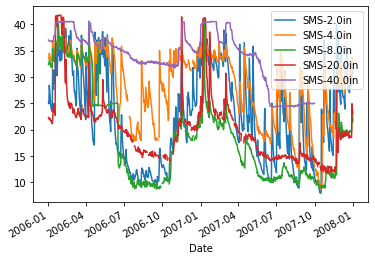

In [5]:
drought_year_sms = sms_station_2053[(sms_station_2053.index.year >= 2006) & (sms_station_2053.index.year <=2007)]
drought_year_sms.plot()

In [6]:
drought_year_sms

,station,SMS-2.0in,SMS-4.0in,SMS-8.0in,SMS-20.0in,SMS-40.0in
Date,,,,,,
2006-01-01,2053:AL:SCAN,25.2,33.6,32.4,22.3,37.0
2006-01-02,2053:AL:SCAN,24.9,33.5,32.3,22.2,36.9
2006-01-03,2053:AL:SCAN,28.4,34.5,33.2,21.9,36.8
2006-01-04,2053:AL:SCAN,27.4,34.1,33.1,22.1,36.8
2006-01-05,2053:AL:SCAN,26.1,34.0,32.6,22.1,36.8
...,...,...,...,...,...,...
2006-12-10,2053:AL:SCAN,23.6,NaN,18.0,20.2,35.6
2007-07-14,2053:AL:SCAN,31.0,33.4,11.1,15.0,24.4
2007-10-12,2053:AL:SCAN,8.4,9.2,8.9,13.6,NaN


In [7]:
esi.set_index('Date', inplace=True)

In [8]:
station_2053_esi = esi[esi['station'] == '2053:AL:SCAN']
station_2053_esi

,ESI,station
Date,,
2001-01-01,0.355971,2053:AL:SCAN
2001-01-08,3.327811,2053:AL:SCAN
2001-01-15,0.596444,2053:AL:SCAN
2001-01-22,2.640280,2053:AL:SCAN
2001-01-29,0.331488,2053:AL:SCAN
...,...,...
2020-12-02,1.522073,2053:AL:SCAN
2020-12-09,1.081615,2053:AL:SCAN
2020-12-16,0.068126,2053:AL:SCAN


<AxesSubplot:xlabel='Date'>

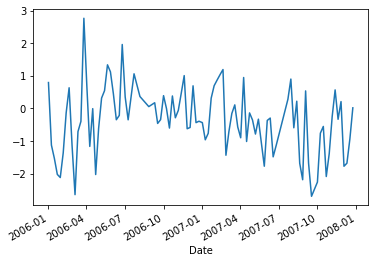

In [9]:
drought_year_esi = station_2053_esi[(station_2053_esi.index.year >= 2006) & (station_2053_esi.index.year <=2007) & (station_2053_esi['ESI'] > -9999.0)]
drought_year_esi['ESI'].plot()

In [10]:
drought_year_esi

,ESI,station
Date,,
2006-01-01,0.795343,2053:AL:SCAN
2006-01-08,-1.123719,2053:AL:SCAN
2006-01-15,-1.531691,2053:AL:SCAN
2006-01-22,-2.022965,2053:AL:SCAN
2006-01-29,-2.118405,2053:AL:SCAN
...,...,...
2007-11-26,0.210939,2053:AL:SCAN
2007-12-03,-1.772133,2053:AL:SCAN
2007-12-10,-1.678634,2053:AL:SCAN


In [16]:
drought_year_sms.sort_index()

,station,SMS-2.0in,SMS-4.0in,SMS-8.0in,SMS-20.0in,SMS-40.0in
Date,,,,,,
2006-01-01,2053:AL:SCAN,25.2,33.6,32.4,22.3,37.0
2006-01-02,2053:AL:SCAN,24.9,33.5,32.3,22.2,36.9
2006-01-03,2053:AL:SCAN,28.4,34.5,33.2,21.9,36.8
2006-01-04,2053:AL:SCAN,27.4,34.1,33.1,22.1,36.8
2006-01-05,2053:AL:SCAN,26.1,34.0,32.6,22.1,36.8
...,...,...,...,...,...,...
2007-12-27,2053:AL:SCAN,28.4,30.6,19.5,18.5,NaN
2007-12-28,2053:AL:SCAN,28.2,30.9,19.7,18.5,NaN
2007-12-29,2053:AL:SCAN,33.7,33.6,23.8,24.9,NaN


In [18]:
drought_year_mean_sms = drought_year_sms.rolling('7D', min_periods=3).mean()

In [22]:
merged = pd.merge(drought_year_esi, drought_year_mean_sms, left_index=True, right_index=True)

<AxesSubplot:xlabel='Date'>

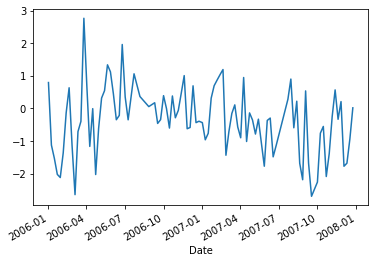

In [24]:
merged['ESI'].plot()

<AxesSubplot:xlabel='Date'>

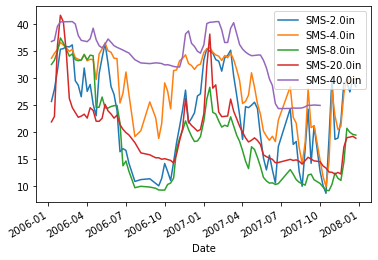

In [28]:
merged[['SMS-2.0in', 'SMS-4.0in', 'SMS-8.0in', 'SMS-20.0in',
       'SMS-40.0in']].plot()

In [32]:
y = merged[['SMS-2.0in', 'SMS-4.0in', 'SMS-8.0in', 'SMS-20.0in',
       'SMS-40.0in']]

In [29]:
merged

,ESI,station,SMS-2.0in,SMS-4.0in,SMS-8.0in,SMS-20.0in,SMS-40.0in
Date,,,,,,,
2006-01-01,0.795343,2053:AL:SCAN,NaN,NaN,NaN,NaN,NaN
2006-01-08,-1.123719,2053:AL:SCAN,25.685714,33.700000,32.542857,21.885714,36.800000
2006-01-15,-1.531691,2053:AL:SCAN,27.942857,34.600000,33.328571,22.900000,37.042857
2006-01-22,-2.022965,2053:AL:SCAN,31.357143,35.328571,34.928571,35.957143,39.628571
2006-01-29,-2.118405,2053:AL:SCAN,35.371429,36.642857,37.471429,41.671429,40.428571
...,...,...,...,...,...,...,...
2007-11-26,0.210939,2053:AL:SCAN,29.242857,27.142857,14.442857,17.228571,NaN
2007-12-03,-1.772133,2053:AL:SCAN,29.242857,30.085714,20.700000,18.971429,NaN
2007-12-10,-1.678634,2053:AL:SCAN,27.442857,29.128571,19.957143,19.066667,NaN


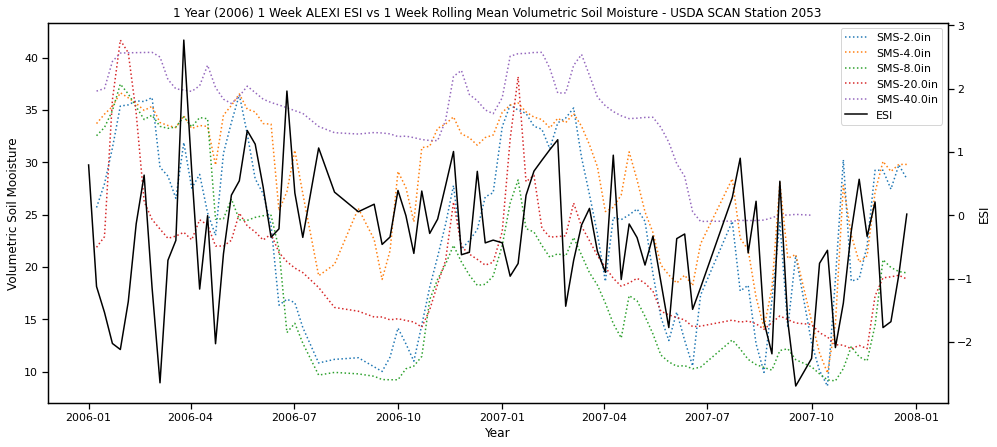

In [56]:
#create a timeseries plot
fig, ax = plt.subplots(figsize=(20,7))
fig.subplots_adjust(right=0.75)

#create the twinx plot
ESI_twin_ax = ax.twinx()

SMS_2, = ax.plot(merged['SMS-2.0in'], label='SMS-2.0in', linestyle='dotted')
SMS_4, = ax.plot(merged['SMS-4.0in'], label='SMS-4.0in', linestyle='dotted')
SMS_8, = ax.plot(merged['SMS-8.0in'], label='SMS-8.0in', linestyle='dotted')
SMS_20, = ax.plot(merged['SMS-20.0in'], label='SMS-20.0in', linestyle='dotted')
SMS_40, = ax.plot(merged['SMS-40.0in'], label='SMS-40.0in', linestyle='dotted')
ESI, = ESI_twin_ax.plot(merged['ESI'], color='black', label='ESI')

ax.set_xlabel('Year')
ax.set_ylabel('Volumetric Soil Mooisture')
ax.set_title('1 Year (2006) 1 Week ALEXI ESI vs 1 Week Rolling Mean Volumetric Soil Moisture - USDA SCAN Station 2053')
ESI_twin_ax.set_ylabel('ESI')
ax.legend(handles=[SMS_2, SMS_4, SMS_8, SMS_20, SMS_40, ESI])

sns.set_context('notebook')

In [46]:
merged.pop('station')

Date
2006-01-01    2053:AL:SCAN
2006-01-08    2053:AL:SCAN
2006-01-15    2053:AL:SCAN
2006-01-22    2053:AL:SCAN
2006-01-29    2053:AL:SCAN
                  ...     
2007-11-26    2053:AL:SCAN
2007-12-03    2053:AL:SCAN
2007-12-10    2053:AL:SCAN
2007-12-17    2053:AL:SCAN
2007-12-24    2053:AL:SCAN
Name: station, Length: 95, dtype: object

In [49]:
import numpy as np

In [58]:
dropped = merged.dropna()

<AxesSubplot:>

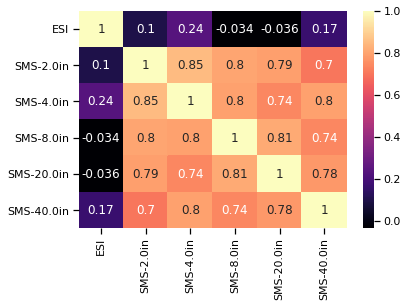

In [61]:
sns.heatmap(dropped.corr(), annot=True, cmap='magma')

In [62]:
dropped.columns

Index(['ESI', 'SMS-2.0in', 'SMS-4.0in', 'SMS-8.0in', 'SMS-20.0in',
       'SMS-40.0in'],
      dtype='object')

In [63]:
dropped['root_zone'] = (((dropped['SMS-4.0in']+dropped['SMS-2.0in'])/2*2+((dropped['SMS-8.0in']+dropped['SMS-4.0in'])/2)*4
                      +((dropped['SMS-20.0in']+dropped['SMS-8.0in'])/2)*12+((dropped['SMS-20.0in']+dropped['SMS-40.0in'])/2)*20))/38 

C:\Users\Corey4005\anaconda3\envs\ESIproj\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [64]:
dropped

,ESI,SMS-2.0in,SMS-4.0in,SMS-8.0in,SMS-20.0in,SMS-40.0in,root_zone
Date,,,,,,,
2006-01-08,-1.123719,25.685714,33.700000,32.542857,21.885714,36.800000,29.086842
2006-01-15,-1.531691,27.942857,34.600000,33.328571,22.900000,37.042857,29.873684
2006-01-22,-2.022965,31.357143,35.328571,34.928571,35.957143,39.628571,36.536090
2006-01-29,-2.118405,35.371429,36.642857,37.471429,41.671429,40.428571,39.897368
2006-02-05,-1.362500,35.485714,36.157143,36.528571,40.457143,40.457143,39.159774
...,...,...,...,...,...,...,...
2007-08-27,-2.186203,16.871429,18.028571,10.157143,14.700000,24.700000,16.695113
2007-09-03,0.538619,24.257143,28.071429,12.028571,15.328571,24.985714,18.416165
2007-09-10,-1.678416,14.214286,20.828571,12.200000,14.985714,24.957143,17.464286


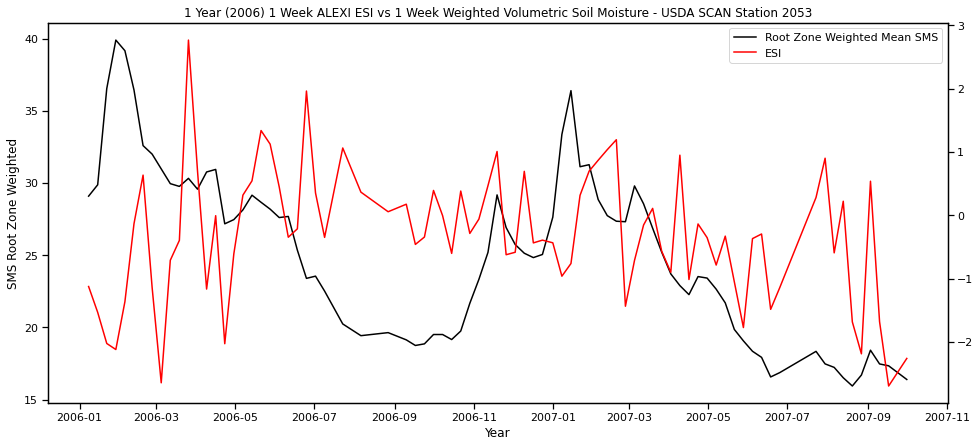

In [67]:
#create a timeseries plot
fig2, ax2= plt.subplots(figsize=(20,7))
fig2.subplots_adjust(right=0.75)

ESI_twin = ax2.twinx()

Root_mean, = ax2.plot(dropped['root_zone'], color='black', label='Root Zone Weighted Mean SMS')
ESI, = ESI_twin.plot(dropped['ESI'], color='red', label='ESI')

ax2.set_xlabel('Year')
ax2.set_ylabel('SMS Root Zone Weighted')
ax2.set_title('1 Year (2006) 1 Week ALEXI ESI vs 1 Week Weighted Volumetric Soil Moisture - USDA SCAN Station 2053')
ESI_twin_ax.set_ylabel('ESI')
ax2.legend(handles=[Root_mean, ESI])

sns.set_context('notebook')

<AxesSubplot:>

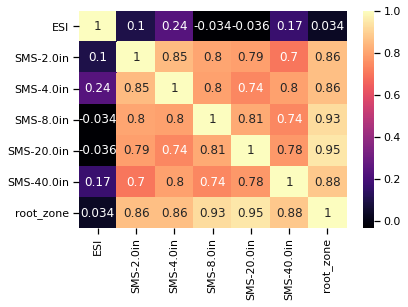

In [68]:
sns.heatmap(dropped.corr(), annot=True, cmap='magma')